# **This is a simulation of how the machine learning process run**

Project Name: Raava: Google Chrome Extensions Artificial Intelligence for Phishing Email Prevention and Image Forgery Detection

Student Name: Mokhamad Fikri Alfawaid

Student Id: 2500125A

Major: IT Cyber Security

Year: 2021

University of Glasgow

# **Code**

In [ ]:
# import the required library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from keras.layers import Input
from keras import backend as K
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
# create arrays for model and test container
ml_model = []
acc_train = []
acc_test = []
precision_train = []
precision_test = []
recall_train = []
recall_test = []
f1_train = []
f1_test = []

In [ ]:
# create function for containing the test results
def storeResult(model, atrain, atest, ptrain, ptest, rtrain, rtest,f1train, f1test):
    ml_model.append(model)
    acc_train.append(atrain)
    acc_test.append(atest)
    precision_train.append(ptrain)
    precision_test.append(ptest)
    recall_train.append(rtrain)
    recall_test.append(rtest)
    f1_train.append(f1train)
    f1_test.append(f1test)

def comparison():
    results = pd.DataFrame({ 'ML Model': ml_model, 'Train Accuracy': acc_train,'Test Accuracy': acc_test, 'Precision Train': precision_train,
    'Precision Test': precision_test, 'Recall Train': recall_train, 'Recall Test': recall_test, 'Train F1': f1_train, 'Test F1': f1_test})
    results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)
    
    return results

In [ ]:
# load the dataset
dataset = pd.read_csv('./Extracted/mix_1677_data.csv')
print(dataset.head())

            Domain  Have_IP  Have_At  ...  Num_Iframe  Domain_Age  Label
0         i4us.com        0        0  ...           0           0      1
1  docs.google.com        0        0  ...           0           0      1
2   banhywkaie.com        0        0  ...           0           0      1
3  docs.google.com        0        0  ...           0           0      1
4           zpr.io        0        1  ...           0           1      1

[5 rows x 24 columns]


In [ ]:
# print the feature of the dataset
print(dataset.columns)

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'Shortened', 'Prefix/Suffix',
       'Sub-domain', 'DNS_Record', 'Number_of_Param', 'Number_of_Period',
       'Web_Traffic', 'StatusBar_Costumized', 'RightClick_Disabled', 'Forward',
       'SSL', 'Iframe_Redirect', 'Num _HiddenTags', 'Num_Hyperlinks',
       'Num_Iframe', 'Domain_Age', 'Label'],
      dtype='object')


In [ ]:
# print the information of the dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Domain                1677 non-null   object
 1   Have_IP               1677 non-null   int64 
 2   Have_At               1677 non-null   int64 
 3   URL_Length            1677 non-null   int64 
 4   URL_Depth             1677 non-null   int64 
 5   Redirection           1677 non-null   int64 
 6   https_Domain          1677 non-null   int64 
 7   Shortened             1677 non-null   int64 
 8   Prefix/Suffix         1677 non-null   int64 
 9   Sub-domain            1677 non-null   int64 
 10  DNS_Record            1677 non-null   int64 
 11  Number_of_Param       1677 non-null   int64 
 12  Number_of_Period      1677 non-null   int64 
 13  Web_Traffic           1677 non-null   int64 
 14  StatusBar_Costumized  1677 non-null   int64 
 15  RightClick_Disabled   1677 non-null   

In [ ]:
# remove umbiguous tupples and assign dataset to variable
data = dataset.drop(['Domain', 'Num _HiddenTags', 'Num_Hyperlinks', 'Num_Iframe', 'RightClick_Disabled'], axis = 1).copy()

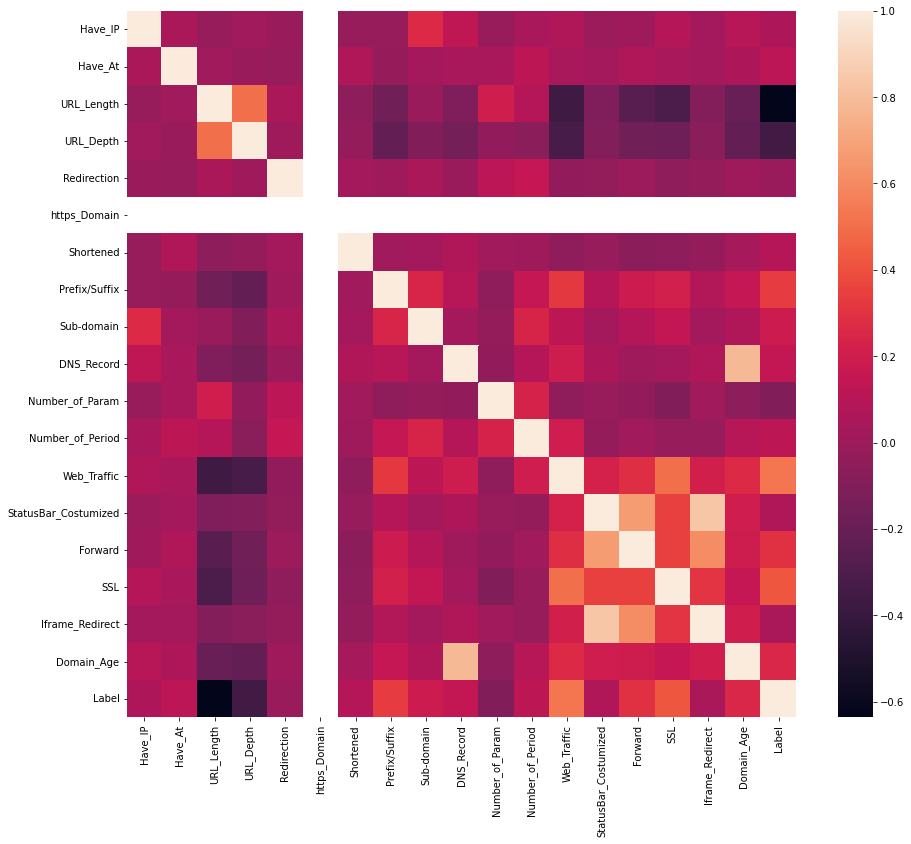

In [ ]:
# showing the correlation heatmap
data.set_index('Label')
plt.figure(figsize=(15,13))
sns.heatmap(data.corr())
plt.show()

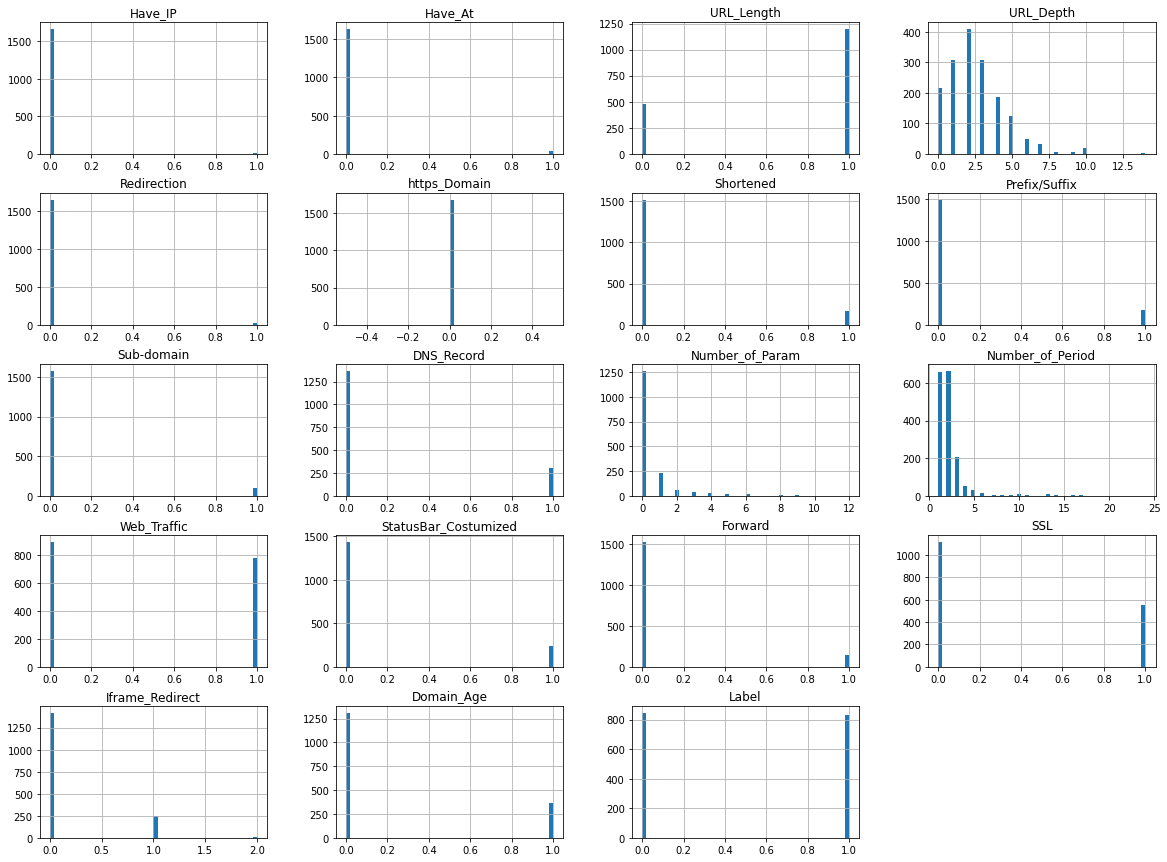

In [ ]:
# plotting the data distribution
data.hist(bins = 50, figsize = (20,15))
plt.show()

In [ ]:
# describe the dataset
print(data.describe())

           Have_IP     Have_At  ...   Domain_Age        Label
count  1677.000000  1677.00000  ...  1677.000000  1677.000000
mean      0.004174     0.02266  ...     0.217054     0.494335
std       0.064492     0.14886  ...     0.412363     0.500117
min       0.000000     0.00000  ...     0.000000     0.000000
25%       0.000000     0.00000  ...     0.000000     0.000000
50%       0.000000     0.00000  ...     0.000000     0.000000
75%       0.000000     0.00000  ...     0.000000     1.000000
max       1.000000     1.00000  ...     1.000000     1.000000

[8 rows x 19 columns]


In [ ]:
# check for null value in the data
print(data.isnull().sum())

Have_IP                 0
Have_At                 0
URL_Length              0
URL_Depth               0
Redirection             0
https_Domain            0
Shortened               0
Prefix/Suffix           0
Sub-domain              0
DNS_Record              0
Number_of_Param         0
Number_of_Period        0
Web_Traffic             0
StatusBar_Costumized    0
Forward                 0
SSL                     0
Iframe_Redirect         0
Domain_Age              0
Label                   0
dtype: int64


In [ ]:
# shuffling the dataset row
data = data.sample(frac=1).reset_index(drop=True)
print(data.head())

   Have_IP  Have_At  URL_Length  ...  Iframe_Redirect  Domain_Age  Label
0        0        0           1  ...                0           0      0
1        0        0           0  ...                0           0      1
2        0        0           1  ...                0           0      0
3        0        0           1  ...                0           0      1
4        0        0           1  ...                0           1      0

[5 rows x 19 columns]


In [ ]:
# splitting the data for training and test & assign features and target columns to X & y
y = data['Label']
X = data.drop(['Label'], axis=1)
print("x shape: {}".format(X.shape))
print("y shape: {}".format(y.shape))
print(X.head())
print(y.head())

x shape: (1677, 18)
y shape: (1677,)
   Have_IP  Have_At  URL_Length  ...  SSL  Iframe_Redirect  Domain_Age
0        0        0           1  ...    0                0           0
1        0        0           0  ...    0                0           0
2        0        0           1  ...    0                0           0
3        0        0           1  ...    1                0           0
4        0        0           1  ...    0                0           1

[5 rows x 18 columns]
0    0
1    1
2    0
3    1
4    0
Name: Label, dtype: int64


# **Model Training**

In [ ]:
# split the dataset into training and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=12)
print("X train shape: {}".format(X_train.shape))
print("X test shape: {}".format(X_test.shape))

X train shape: (1341, 18)
X test shape: (336, 18)


In [ ]:
# decision tree classifier
tree = DecisionTreeClassifier()
print(tree.fit(X_train, y_train))

# predict the target
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

# calculate the accuracy of the model
acc_train_tree = accuracy_score(y_train, y_train_tree)
acc_test_tree = accuracy_score(y_test, y_test_tree)
precision_train_tree = precision_score(y_train, y_train_tree)
precision_test_tree = precision_score(y_test, y_test_tree)
recall_train_tree = recall_score(y_train, y_train_tree)
recall_test_tree = recall_score(y_test, y_test_tree)
f1_train_tree = f1_score(y_train, y_train_tree)
f1_test_tree = f1_score(y_test, y_test_tree)

storeResult('DecisionTree', acc_train_tree, acc_test_tree,precision_train_tree,precision_test_tree,recall_train_tree,recall_test_tree, f1_train_tree, f1_test_tree)

print("Decision Tree: Accuracy on training data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test data: {:.3f}".format(acc_test_tree))
print("Decision Tree: Precision on training data: {:.3f}".format(precision_train_tree))
print("Decision Tree: Precision on test data: {:.3f}".format(precision_test_tree))
print("Decision Tree: Recall on training data: {:.3f}".format(recall_train_tree))
print("Decision Tree: Recall on test data: {:.3f}".format(recall_test_tree))
print("Decision Tree: F1 on training data: {:.3f}".format(f1_train_tree))
print("Decision Tree: F1 on test data: {:.3f}".format(f1_test_tree))


DecisionTreeClassifier()
Decision Tree: Accuracy on training data: 0.979
Decision Tree: Accuracy on test data: 0.926
Decision Tree: Precision on training data: 0.992
Decision Tree: Precision on test data: 0.948
Decision Tree: Recall on training data: 0.965
Decision Tree: Recall on test data: 0.896
Decision Tree: F1 on training data: 0.979
Decision Tree: F1 on test data: 0.922


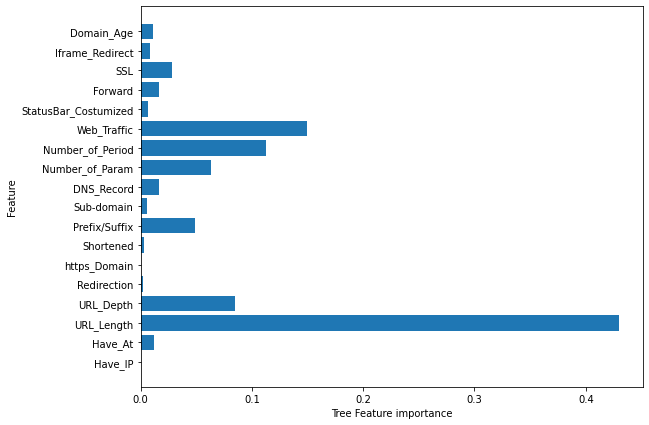

In [ ]:
# check the important feature
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Tree Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
# random forest classifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

# predict the target
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

# calculate the accuracy of the model
acc_train_forest = accuracy_score(y_train, y_train_forest)
acc_test_forest = accuracy_score(y_test, y_test_forest)
precision_train_forest = precision_score(y_train, y_train_forest)
precision_test_forest = precision_score(y_test, y_test_forest)
recall_train_forest = recall_score(y_train, y_train_forest)
recall_test_forest = recall_score(y_test, y_test_forest)
f1_train_forest = f1_score(y_train, y_train_forest)
f1_test_forest = f1_score(y_test, y_test_forest)

storeResult('RandomForest', acc_train_forest, acc_test_forest, precision_train_forest, precision_test_forest, recall_train_forest, recall_test_forest, f1_train_forest, f1_test_forest)

print("Random Forest: Accuracy on training data: {:.3f}".format(acc_train_forest))
print("Random Forest: Accuracy on test data: {:.3f}".format(acc_test_forest))
print("Random Forest: Precision on training data: {:.3f}".format(precision_train_forest))
print("Random Forest: Precision on test data: {:.3f}".format(precision_test_forest))
print("Random Forest: Recall on training data: {:.3f}".format(recall_train_forest))
print("Random Forest: Recall on test data: {:.3f}".format(recall_test_forest))
print("Random Forest: F1 on training data: {:.3f}".format(f1_train_forest))
print("Random Forest: F1 on test data: {:.3f}".format(f1_test_forest))

Random Forest: Accuracy on training data: 0.979
Random Forest: Accuracy on test data: 0.938
Random Forest: Precision on training data: 0.991
Random Forest: Precision on test data: 0.955
Random Forest: Recall on training data: 0.967
Random Forest: Recall on test data: 0.915
Random Forest: F1 on training data: 0.979
Random Forest: F1 on test data: 0.935


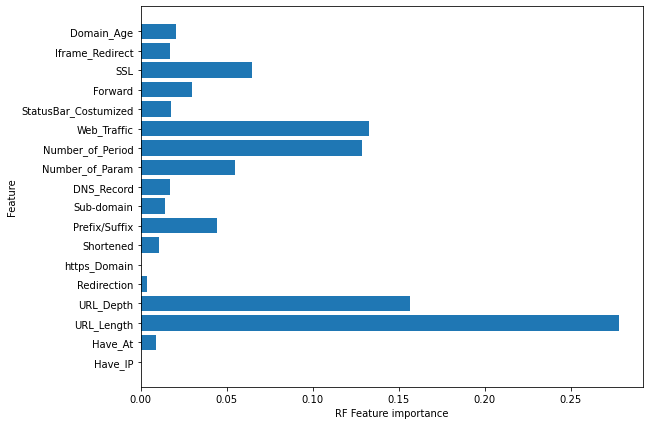

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("RF Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
# support vector machine
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)

# predict the target
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)
# calculate and print the result
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test, y_test_svm)
precision_train_svm = precision_score(y_train,y_train_svm)
precision_test_svm = precision_score(y_test, y_test_svm)
recall_train_svm = recall_score(y_train,y_train_svm)
recall_test_svm = recall_score(y_test, y_test_svm)
f1_train_svm = f1_score(y_train,y_train_svm)
f1_test_svm = f1_score(y_test, y_test_svm)

storeResult('SVM', acc_train_svm, acc_test_svm, precision_train_svm, precision_test_svm, recall_train_svm, recall_test_svm, f1_train_svm, f1_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))
print("SVM: Precision on training Data: {:.3f}".format(precision_train_svm))
print("SVM : Precision on test Data: {:.3f}".format(precision_test_svm))
print("SVM: Recall on training Data: {:.3f}".format(recall_train_svm))
print("SVM : Recall on test Data: {:.3f}".format(recall_test_svm))
print("SVM: F1 on training Data: {:.3f}".format(f1_train_svm))
print("SVM : F1 on test Data: {:.3f}".format(f1_test_svm))

SVM: Accuracy on training Data: 0.901
SVM : Accuracy on test Data: 0.887
SVM: Precision on training Data: 0.946
SVM : Precision on test Data: 0.932
SVM: Recall on training Data: 0.848
SVM : Recall on test Data: 0.829
SVM: F1 on training Data: 0.895
SVM : F1 on test Data: 0.877


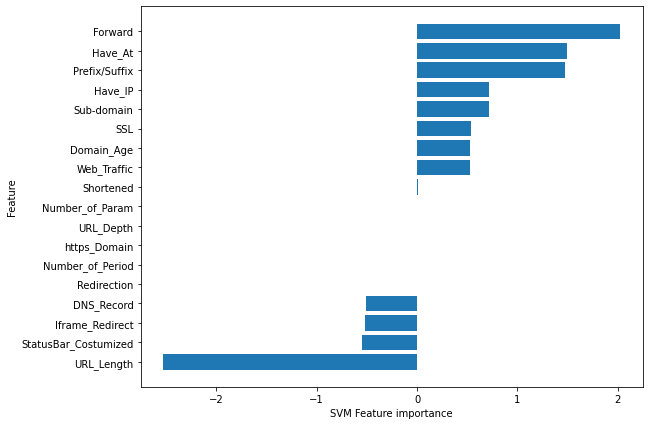

In [ ]:
# check the important feature
plt.figure(figsize=(9,7))
imp = svm.coef_
names = X_train.columns
ip = imp.flatten()
ip, names = zip(*sorted(zip(ip,names)))
plt.barh(range(len(names)),ip, align='center')
plt.yticks(range(len(names)), names)
plt.xlabel("SVM Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
# new hybrid
y_train_hybrid = []
y_test_hybrid = []

for i in range(len(y_train)):
    if y_train_tree[i]+y_train_forest[i]+y_train_svm[i] == 1:
        y_train_hybrid.append(0)
    elif y_train_tree[i]+y_train_forest[i]+y_train_svm[i] == 0 :
        y_train_hybrid.append(0)
    elif y_train_tree[i]+y_train_forest[i]+y_train_svm[i] >=2 :
        y_train_hybrid.append(1)

for j in range(len(y_test)):
    if y_test_tree[j]+y_test_forest[j]+y_test_svm[j] == 1:
        y_test_hybrid.append(0)
    elif y_test_tree[j]+y_test_forest[j]+y_test_svm[j] == 0 :
        y_test_hybrid.append(0)
    elif y_test_tree[j]+y_test_forest[j]+y_test_svm[j] >=2 :
        y_test_hybrid.append(1)

acc_train_hybrid = accuracy_score(y_train,y_train_hybrid)
acc_test_hybrid = accuracy_score(y_test,y_test_hybrid)
precision_train_hybrid = precision_score(y_train,y_train_hybrid)
precision_test_hybrid = precision_score(y_test, y_test_hybrid)
recall_train_hybrid = recall_score(y_train,y_train_hybrid)
recall_test_hybrid = recall_score(y_test, y_test_hybrid)
f1_train_hybrid = f1_score(y_train,y_train_hybrid)
f1_test_hybrid = f1_score(y_test, y_test_hybrid)

storeResult('Hybrid', acc_train_hybrid, acc_test_hybrid, precision_train_hybrid, precision_test_hybrid, recall_train_hybrid, recall_test_hybrid, f1_train_hybrid, f1_test_hybrid)

print("Hybrid: Accuracy on training Data: {:.3f}".format(acc_train_hybrid))
print("Hybrid: Accuracy on test Data: {:.3f}".format(acc_test_hybrid))
print("Hybrid: Precision on training Data: {:.3f}".format(precision_train_hybrid))
print("Hybrid: Precision on test Data: {:.3f}".format(precision_test_hybrid))
print("Hybrid: Recall on training Data: {:.3f}".format(recall_train_hybrid))
print("Hybrid: Recall on test Data: {:.3f}".format(recall_test_hybrid))
print("Hybrid: F1 on training Data: {:.3f}".format(f1_train_hybrid))
print("Hybrid: F1 on test Data: {:.3f}".format(f1_test_hybrid))

Hybrid: Accuracy on training Data: 0.979
Hybrid: Accuracy on test Data: 0.943
Hybrid: Precision on training Data: 0.992
Hybrid: Precision on test Data: 0.974
Hybrid: Recall on training Data: 0.965
Hybrid: Recall on test Data: 0.909
Hybrid: F1 on training Data: 0.979
Hybrid: F1 on test Data: 0.940


In [ ]:
pd.options.display.max_columns= None
display(comparison())

,ML Model,Train Accuracy,Test Accuracy,Precision Train,Precision Test,Recall Train,Recall Test,Train F1,Test F1
0,DecisionTree,0.97912,0.925595,0.992272,0.948387,0.965414,0.896341,0.978659,0.921630
1,RandomForest,0.97912,0.937500,0.990755,0.955414,0.966917,0.914634,0.978691,0.934579
2,SVM,0.90082,0.886905,0.946309,0.931507,0.848120,0.829268,0.894528,0.877419
3,Hybrid,0.97912,0.943452,0.992272,0.973856,0.965414,0.908537,0.978659,0.940063


# **Model Deploy**

In [ ]:
# export model
joblib.dump(tree,'./ML_Model/decision_tree')
joblib.dump(forest,'./ML_Model/random_forest')
joblib.dump(svm,'./ML_Model/svm')

['./ML_Model/svm']